In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

In [ ]:
credit_dataset = pd.read_csv('D:\Quyen\PYTHON\TRAINING DATA\FinalTest - K2\Dataset\CreditCardCustomer\BankChurners.csv')

In [ ]:
credit_dataset.shape

(10127, 23)

In [ ]:
credit_dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [ ]:
# Xóa 2 cột cuối vị không cần
credit_dataset = credit_dataset.drop(credit_dataset.columns[-2:], axis = 1)

In [ ]:
credit_dataset.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [ ]:
credit_dataset.duplicated().sum()

0

In [ ]:
corrcredit_dataset = credit_dataset.corr()
corrcredit_dataset

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


In [ ]:
one_corr = np.ones_like(corrcredit_dataset, dtype = bool)
one_corr

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [ True,  True,  T

In [ ]:
mask = np.triu(one_corr)
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True],
       [False, False, Fa

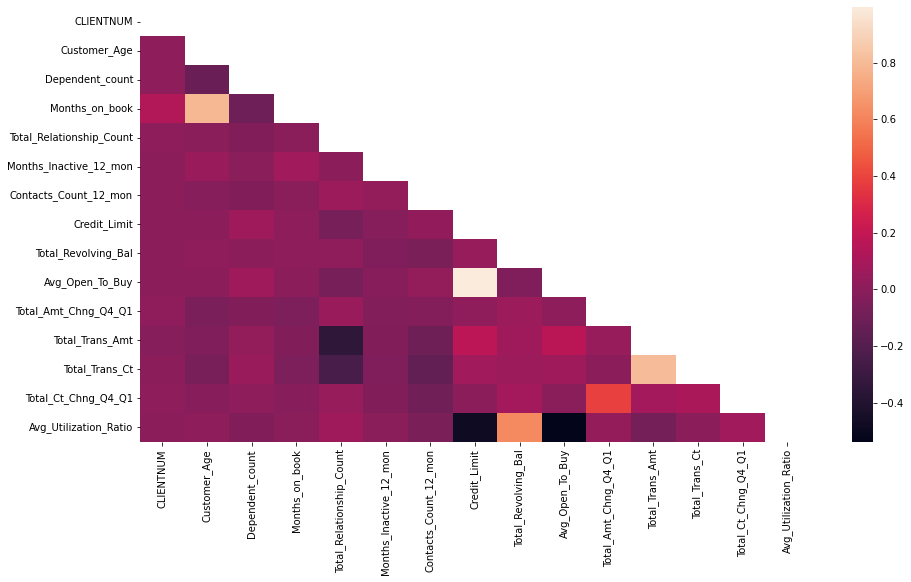

In [ ]:
size = plt.subplots(figsize = (15, 8))
sns.heatmap(data = corrcredit_dataset, mask = mask);

In [ ]:
adjusted_mask = mask[1:, :-1]
adjusted_mask

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
         

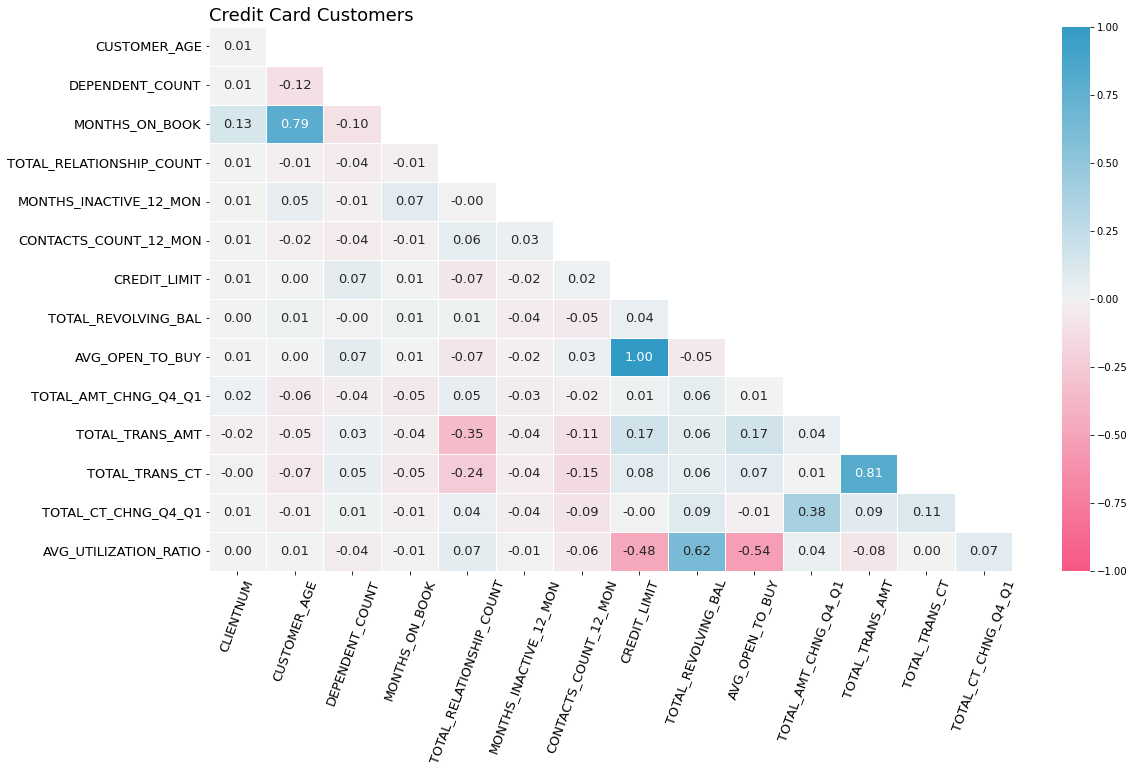

In [ ]:
fig, ax = plt.subplots(figsize = (18, 10))
adjusted_credit_dataset_corr = corrcredit_dataset.iloc[1:, :-1]

# Sử dụng hsluv.org để chọn mã cho chart
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap = True)

sns.heatmap(data = adjusted_credit_dataset_corr, mask = adjusted_mask,
            annot = True, annot_kws = {'fontsize': 13}, fmt = '.2f', cmap = cmap,
            vmin = -1, vmax = 1,
            linecolor = 'white', linewidths = 0.5);

yticks = [i.upper() for i in adjusted_credit_dataset_corr.index]
xticks = [i.upper() for i in adjusted_credit_dataset_corr.columns]

ax.set_yticklabels(yticks, rotation = 0, fontsize = 13);
ax.set_xticklabels(xticks, rotation = 70, fontsize = 13);

title = 'Credit Card Customers'
ax.set_title(title, loc = 'left', fontsize = 18);

In [ ]:
#Get the list of numerical columns

credit_dataset.select_dtypes(['int64','float64']).columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
#Get the list of categorical columns

credit_dataset.select_dtypes(['object']).columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

In [ ]:
#Get the value count for Attrition flag
credit_dataset['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
#Get the value count for Gender column

credit_dataset['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [ ]:
#Get the value count for Education_Level column

credit_dataset['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
#Replace the unknown Education_Level with the mode

credit_dataset['Education_Level'].replace('Unknown',credit_dataset['Education_Level'].mode()[0],inplace=True)
credit_dataset['Education_Level'].value_counts()

Graduate         4647
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [ ]:
#Get the value count for Marital_Status column

credit_dataset['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
#Replace the unknown Marital_Status with the mode

credit_dataset['Marital_Status'].replace('Unknown',credit_dataset['Marital_Status'].mode()[0],inplace=True)
credit_dataset['Marital_Status'].value_counts()

Married     5436
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64

In [ ]:
#Get the value count for Income_Category

credit_dataset['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
#Replace the unknown income category with the mode

credit_dataset['Income_Category'].replace('Unknown',credit_dataset['Income_Category'].mode()[0],inplace=True)
credit_dataset['Income_Category'].value_counts()

Less than $40K    4673
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: Income_Category, dtype: int64

In [ ]:
#Get the value count for Card_Category

credit_dataset['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [ ]:
credit_dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


<AxesSubplot:>

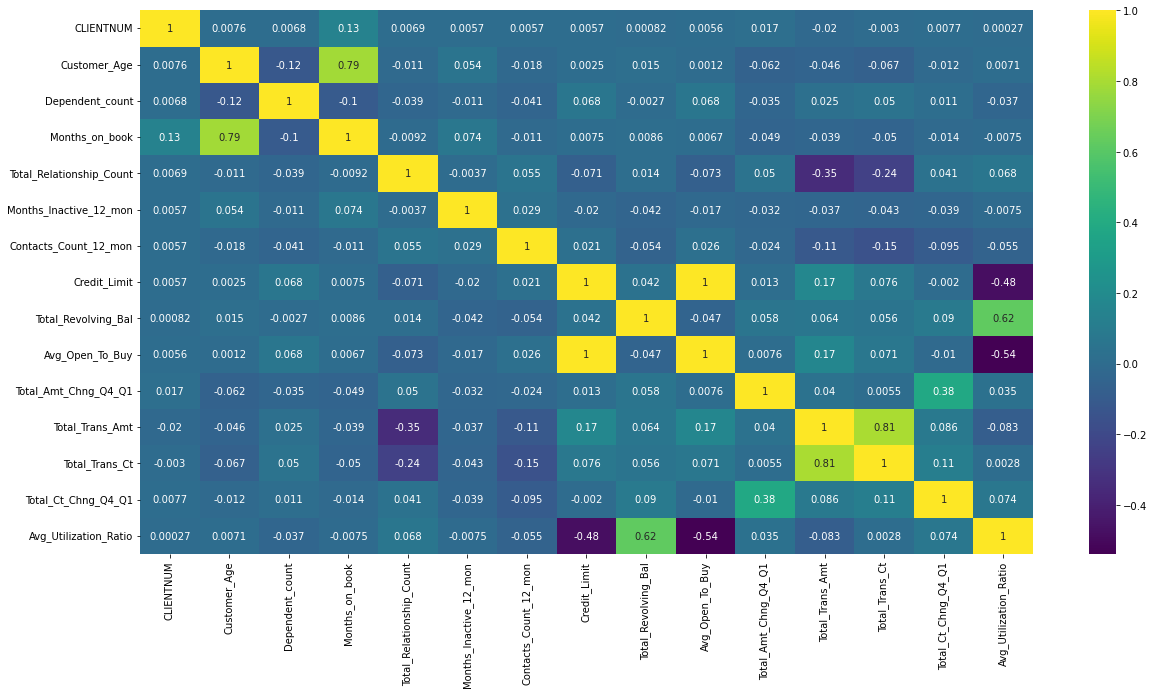

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(credit_dataset.corr(), annot=True, cmap="viridis")

In [ ]:
# Encoding for categorical columns:Attrition_Flag

credit_dataset['Attrition_Flag'].replace(['Existing Customer','Attrited Customer'],[0,1],inplace=True)
credit_dataset['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
#Encoding for categorical columns:Gender

credit_dataset['Gender'].replace(['F','M'],[0,1],inplace=True)
credit_dataset['Gender'].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [ ]:
#Creating dummy variables for columns:Education_Level,Marital_Status,Income_Category,Card_Category

dummy=pd.get_dummies(credit_dataset[['Education_Level','Marital_Status','Income_Category','Card_Category']],drop_first=True)

credit_dataset=pd.concat([credit_dataset,dummy],axis=1)

In [ ]:
#Dropping columns for which dummy variable is created

credit_dataset.drop(['Education_Level','Marital_Status','Income_Category','Card_Category'],axis=1,inplace=True)

In [ ]:
#Get the view of the dataset

credit_dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,1,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,1,0,0,1,0,0,1,0,0,0,0,0
1,818770008,0,49,0,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,713982108,0,51,1,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,769911858,0,40,0,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,1,0,0,1,0,0,0,0,1,0,0,0
4,709106358,0,40,1,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,1,1,0,0,1,0,0,0,0,0


In [ ]:
#Validate the shape of dataset

credit_dataset.shape

(10127, 31)

In [ ]:
#Get the info of the dataset

credit_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       10127 non-null  int64  
 1   Attrition_Flag                  10127 non-null  int64  
 2   Customer_Age                    10127 non-null  int64  
 3   Gender                          10127 non-null  int64  
 4   Dependent_count                 10127 non-null  int64  
 5   Months_on_book                  10127 non-null  int64  
 6   Total_Relationship_Count        10127 non-null  int64  
 7   Months_Inactive_12_mon          10127 non-null  int64  
 8   Contacts_Count_12_mon           10127 non-null  int64  
 9   Credit_Limit                    10127 non-null  float64
 10  Total_Revolving_Bal             10127 non-null  int64  
 11  Avg_Open_To_Buy                 10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1            

In [ ]:
#Get statistical information of the dataset

credit_dataset.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,0.470919,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.044534,0.458872,0.198776,0.050953,0.146835,0.536783,0.389355,0.176755,0.138442,0.151575,0.461440,0.011455,0.001975,0.054804
std,3.690378e+07,0.367235,8.016814,0.499178,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.206289,0.498330,0.399098,0.219912,0.353959,0.498670,0.487628,0.381480,0.345380,0.358626,0.498536,0.106416,0.044398,0.227608
min,7.080821e+08,0.000000,26.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.130368e+08,0.000000,41.000000,0.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.179264e+08,0.000000,46.000000,0.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.731435e+08,0.000000,52.000000,1.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,8.283431e+08,1.000000,73.000000,1.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


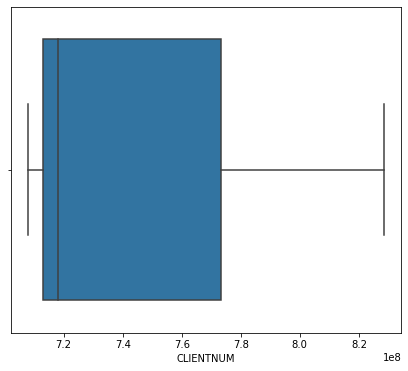

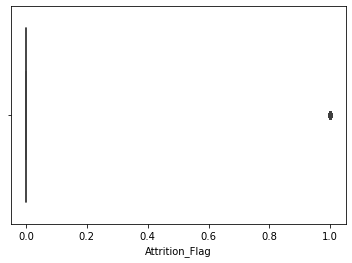

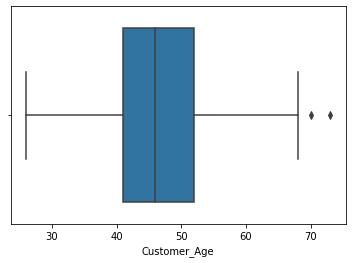

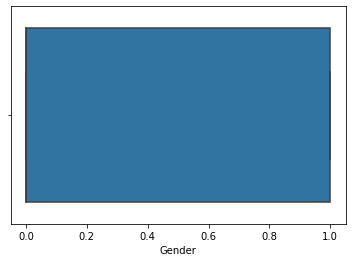

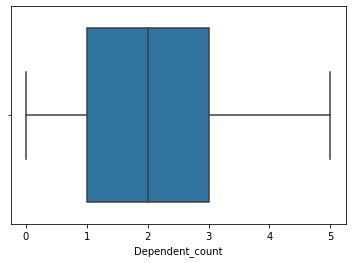

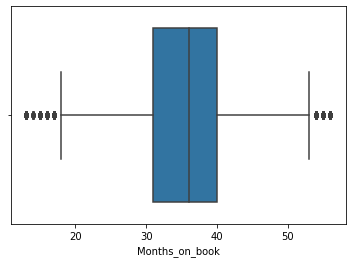

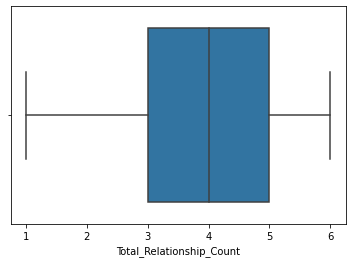

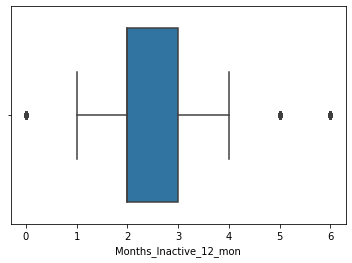

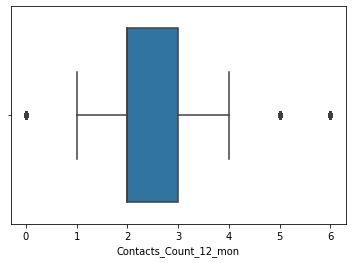

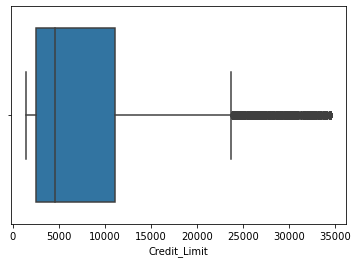

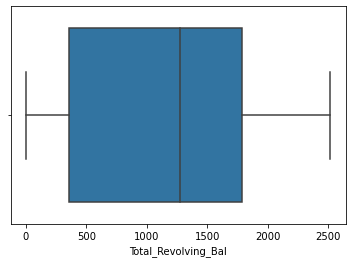

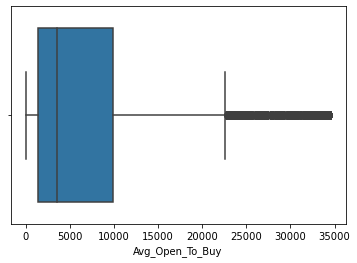

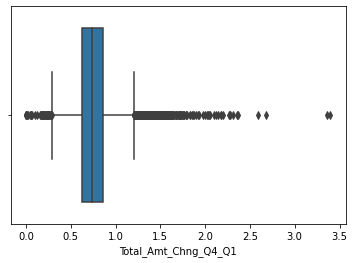

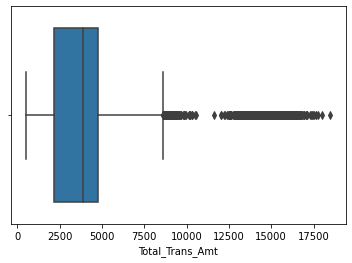

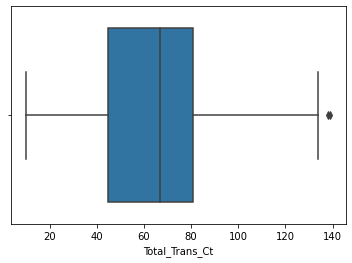

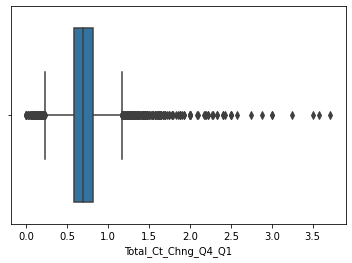

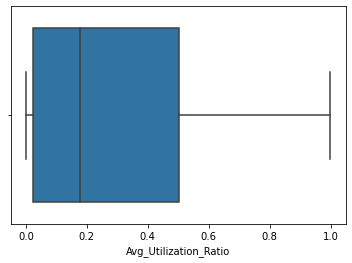

In [ ]:
plt.figure(figsize=[7,6])
num_cols = credit_dataset.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(credit_dataset[num_cols[i]])
    plt.show()


DROPPING OUTLIERs

In [ ]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    LTV = q25-(1.5*IQR)
    UTV = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> UTV else y).apply(lambda y: q5 if y < LTV else y)

In [ ]:
outlier_list = ['Months_on_book','Months_Inactive_12_mon','Contacts_Count_12_mon',
                'Credit_Limit','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
                'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

In [ ]:
for i in credit_dataset[outlier_list]:
    credit_dataset[i]=treat_outlier(credit_dataset[i])

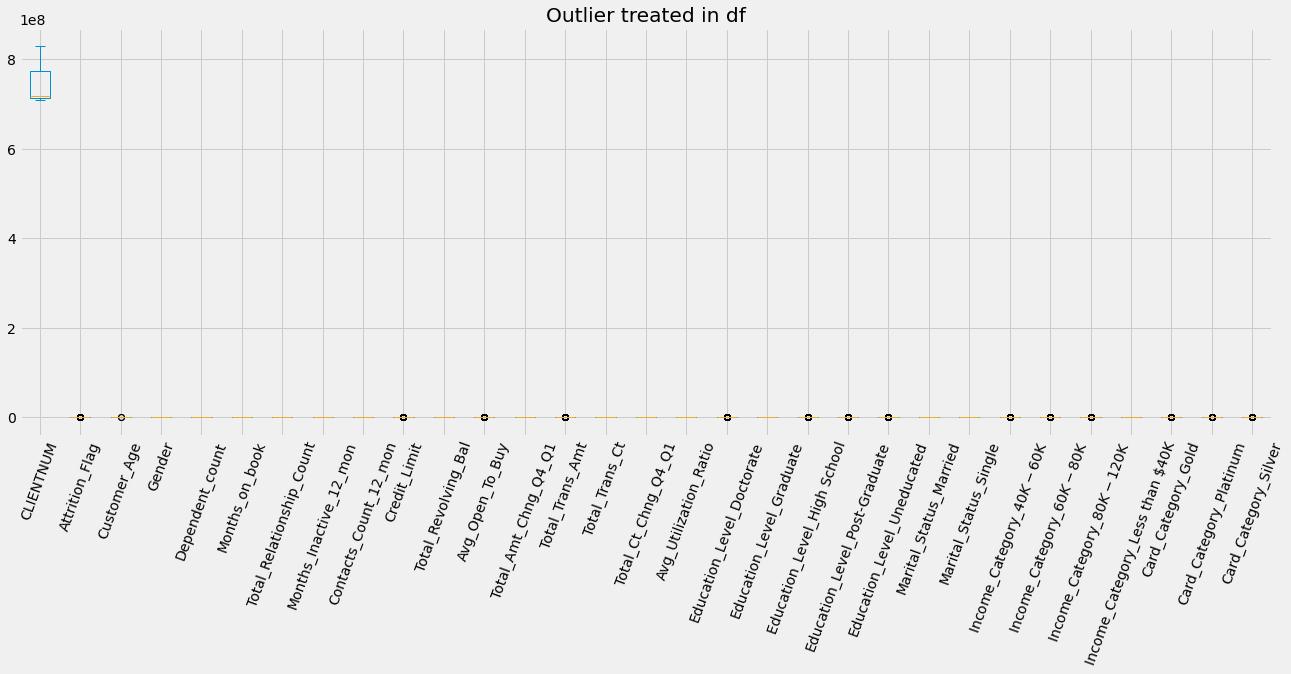

In [ ]:
plt.style.use('fivethirtyeight')
outlier= credit_dataset.plot(kind='box',figsize=(20,7));
plt.xticks(rotation=70);
plt.title('Outlier treated in df');

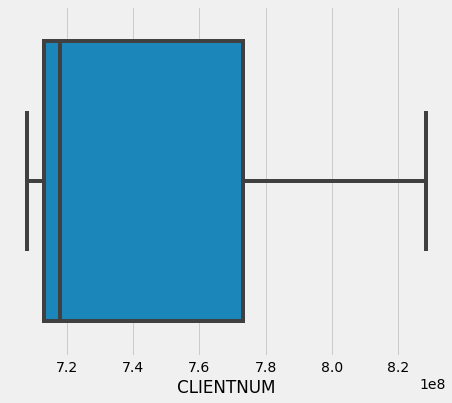

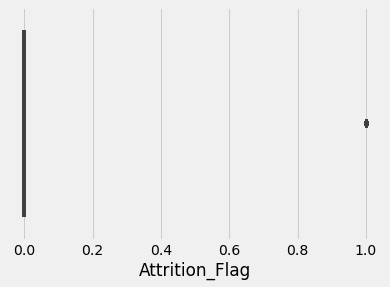

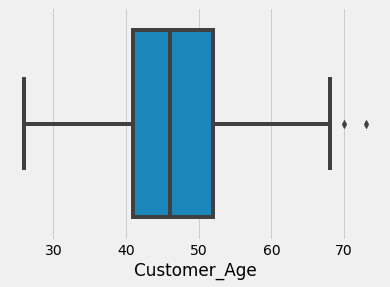

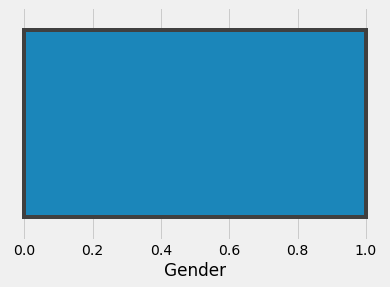

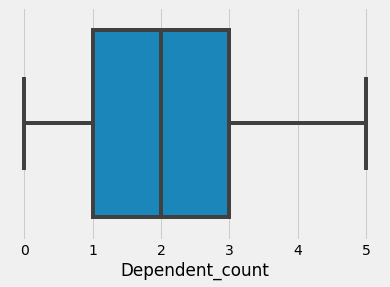

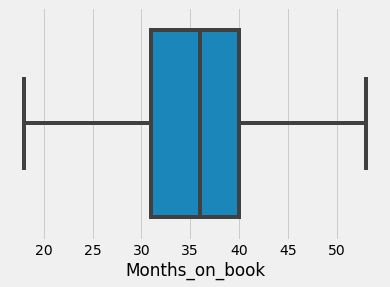

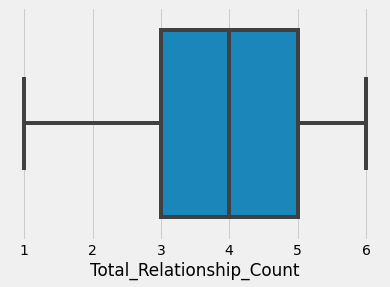

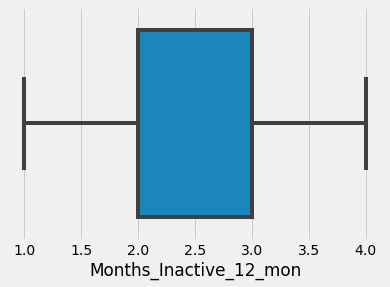

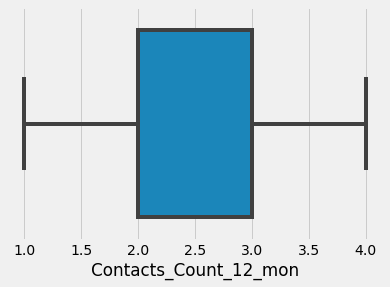

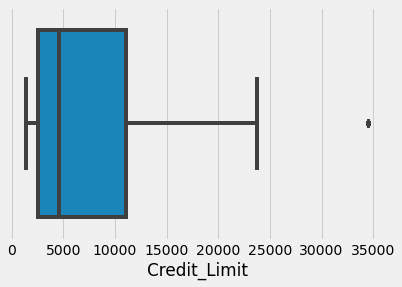

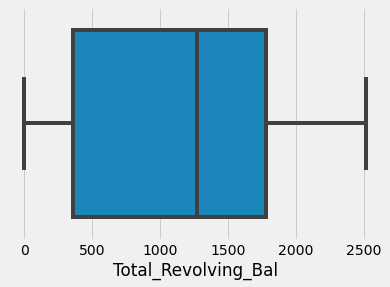

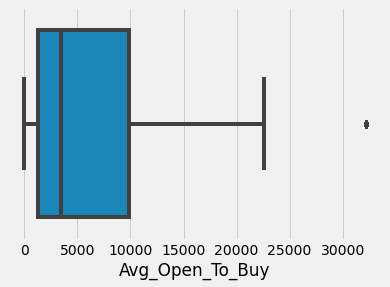

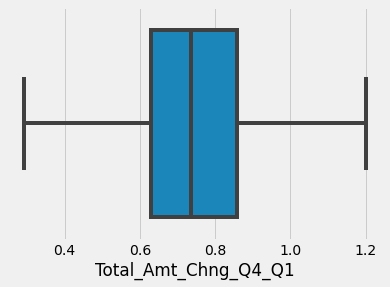

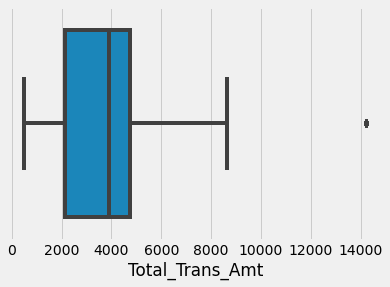

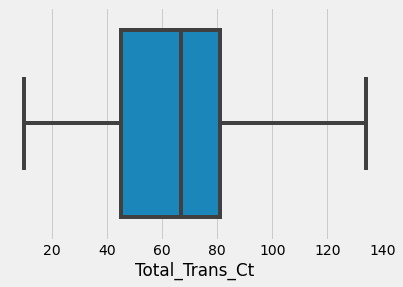

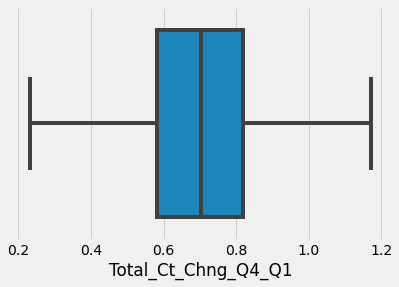

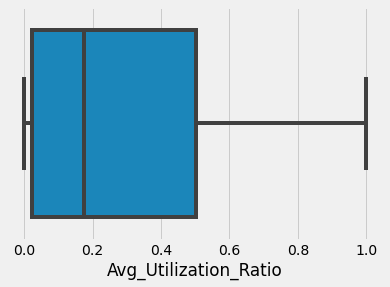

In [ ]:
#Rechecking whether extreme values are there in dataset

plt.figure(figsize=[7,6])
num_cols = credit_dataset.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(credit_dataset[num_cols[i]])
    plt.show()

In [ ]:
#Churn customers

Churn=credit_dataset[credit_dataset['Attrition_Flag']==1]
Churn.shape

(1627, 31)

In [ ]:
Churn.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Marital_Status_Married,Marital_Status_Single,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
21,708508758,1,62,0,0,49.0,2,3.0,3.0,1438.3,0,1438.3,1.047,692.0,16.0,0.600,0.000,0,1,0,0,0,1,0,0,0,0,1,0,0,0
39,708300483,1,66,0,0,50.0,5,4.0,3.0,7882.0,605,7277.0,1.052,704.0,16.0,0.368,0.077,1,0,0,0,0,1,0,0,0,0,1,0,0,0
51,779471883,1,54,0,1,40.0,2,3.0,1.0,1438.3,808,630.3,0.997,705.0,19.0,0.900,0.562,0,1,0,0,0,1,0,0,0,0,1,0,0,0
54,714374133,1,56,1,2,36.0,1,3.0,3.0,15769.0,0,15769.0,1.041,602.0,15.0,0.364,0.000,0,1,0,0,0,1,0,0,0,0,0,0,0,0
61,712030833,1,48,1,2,35.0,2,4.0,4.0,34516.0,0,32183.4,0.763,691.0,15.0,0.500,0.000,0,1,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:
#Non Churn customers
NonChurn=credit_dataset[credit_dataset['Attrition_Flag']==0]
NonChurn.shape

(8500, 31)

In [ ]:
#Get the gender count
credit_dataset['Gender'].value_counts()

0    5358
1    4769
Name: Gender, dtype: int64

In [ ]:
Churn['Gender'].value_counts()

0    930
1    697
Name: Gender, dtype: int64

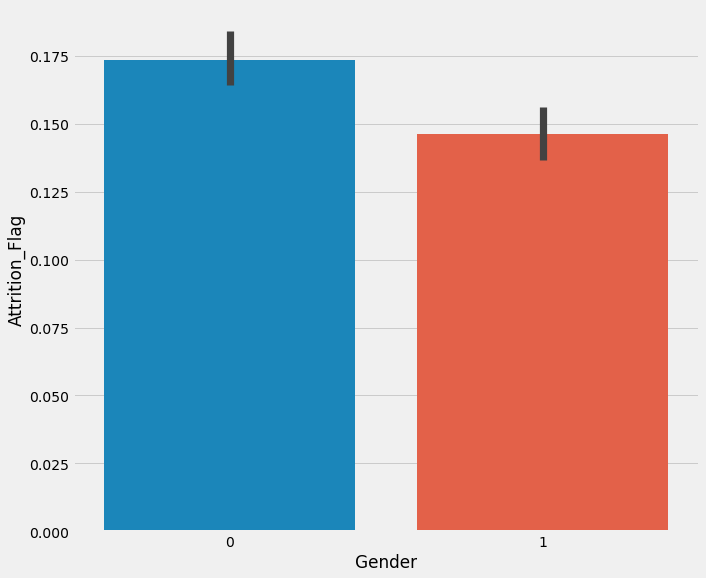

In [ ]:
#Barplot for checking how gender is responsible for Attrition

plt.figure(figsize=(10,9))
sns.barplot(x='Gender',y='Attrition_Flag',data=credit_dataset)
plt.show()

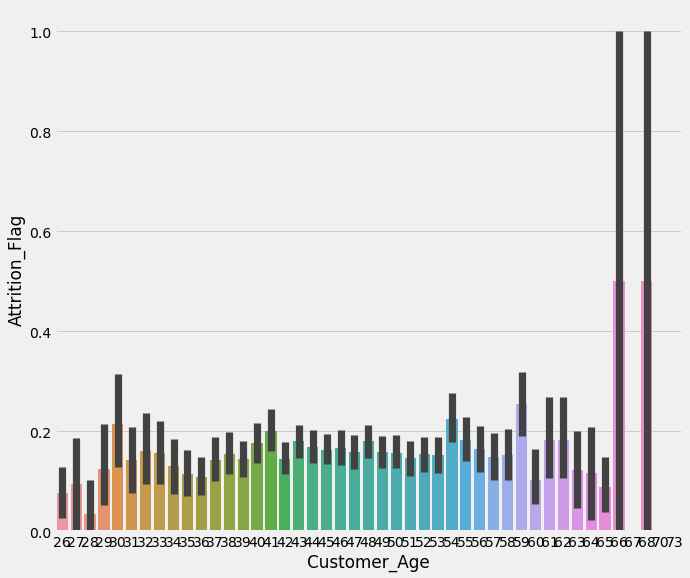

In [ ]:
#Barplot for checking how age is responsible for Attrition

plt.figure(figsize=(10,9))
sns.barplot(x='Customer_Age',y='Attrition_Flag',data=credit_dataset)
plt.show()

In [ ]:
#function for age groups

def Age_Group(x):
    if x>=20 and x<30:
        return 30
    elif x>=30 and x<40:
        return 40
    elif x>=40 and x<50:
        return 50
    else:
        return 60

credit_dataset['Age_Group']=credit_dataset['Customer_Age'].apply(Age_Group)

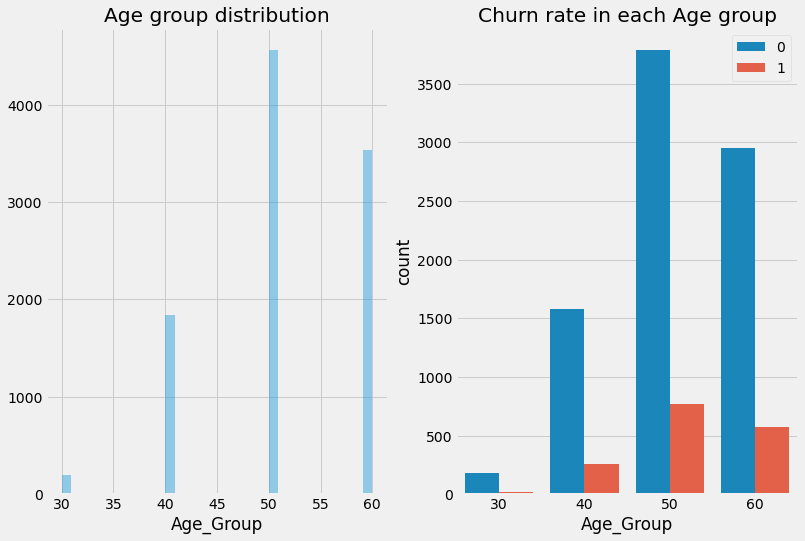

In [ ]:
#Distribution plot

plt.subplots(1,2,figsize=(12,8))

plt.subplot(1,2,1)
plt.title('Age group distribution')
sns.distplot(credit_dataset.Age_Group, hist=True, kde=False)

plt.subplot(1,2,2)
plt.title('Churn rate in each Age group')
sns.countplot('Age_Group', hue = 'Attrition_Flag', data = credit_dataset)
plt.legend()
plt.show()

In [ ]:
credit_dataset['Months_Inactive_12_mon'].value_counts()

3.0    3846
2.0    3282
1.0    2262
4.0     737
Name: Months_Inactive_12_mon, dtype: int64

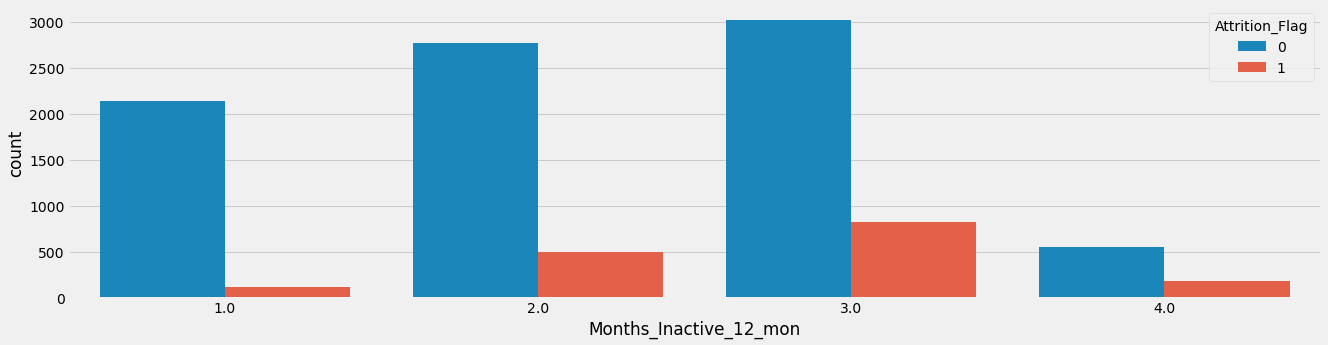

In [ ]:
plt.figure(figsize = (20,5))
sns.countplot('Months_Inactive_12_mon', hue = 'Attrition_Flag', data = credit_dataset);

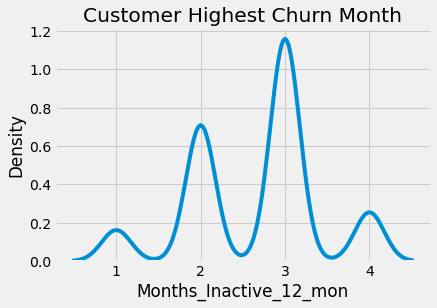

In [ ]:
plt.figure(figsize=(6,4))
plt.title('Customer Highest Churn Month')
sns.distplot(Churn.Months_Inactive_12_mon,hist=False)
plt.show()

In [ ]:
credit_dataset['Dependent_count'].value_counts()

3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64

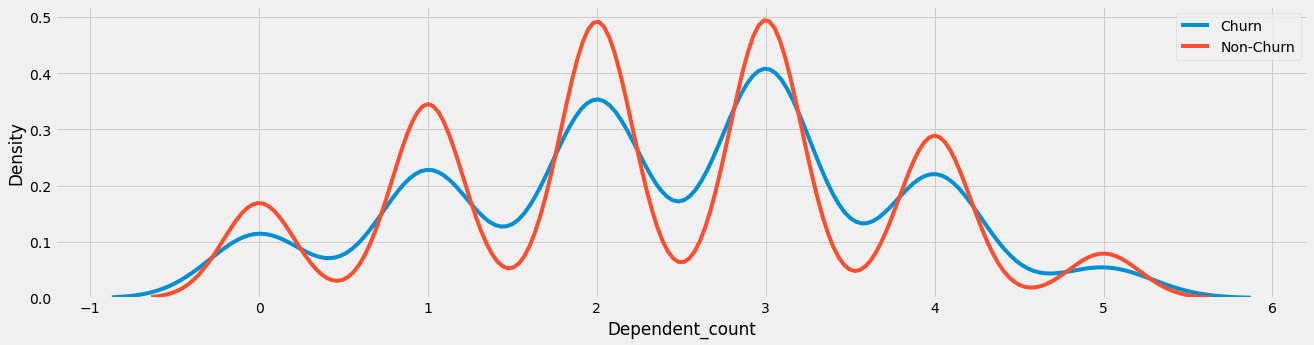

In [ ]:
plt.figure(figsize = (20,5))
sns.distplot(Churn.Dependent_count, hist = False, label = 'Churn')
sns.distplot(NonChurn.Dependent_count, hist = False, label  = 'Non-Churn')
plt.legend()
plt.show()

In [ ]:
credit_dataset['Credit_Limit'].value_counts()

34516.0    984
1438.3     507
9959.0      18
15987.0     18
3735.0      11
          ... 
16815.0      1
11538.0      1
3340.0       1
10541.0      1
10388.0      1
Name: Credit_Limit, Length: 5749, dtype: int64

Customers churn more when they have dependent count more than 3 as compared to non churn customers

In [ ]:
credit_dataset['Credit_Limit'].describe()

count    10127.000000
mean      8920.017883
std       9757.426497
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

In [ ]:
Churn['Credit_Limit'].describe()

count     1627.000000
mean      8403.644253
std       9729.326618
min       1438.300000
25%       2114.000000
50%       4178.000000
75%       9933.500000
max      34516.000000
Name: Credit_Limit, dtype: float64

In [ ]:
NonChurn['Credit_Limit'].describe()

count     8500.000000
mean      9018.857871
std       9760.252018
min       1438.300000
25%       2602.000000
50%       4643.500000
75%      11252.750000
max      34516.000000
Name: Credit_Limit, dtype: float64

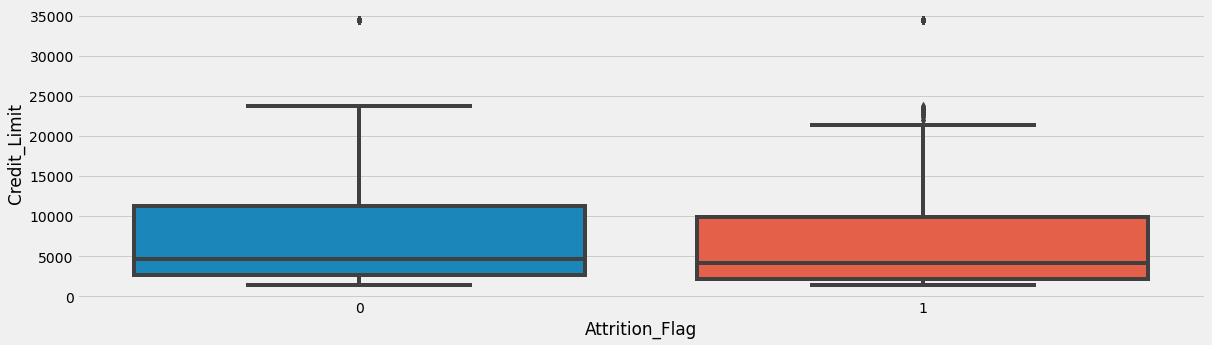

In [ ]:
#Credit Limit for Churn Customers

plt.figure(figsize = (18,5))
sns.boxplot(x = credit_dataset['Attrition_Flag'], y =credit_dataset['Credit_Limit'] )
plt.show()

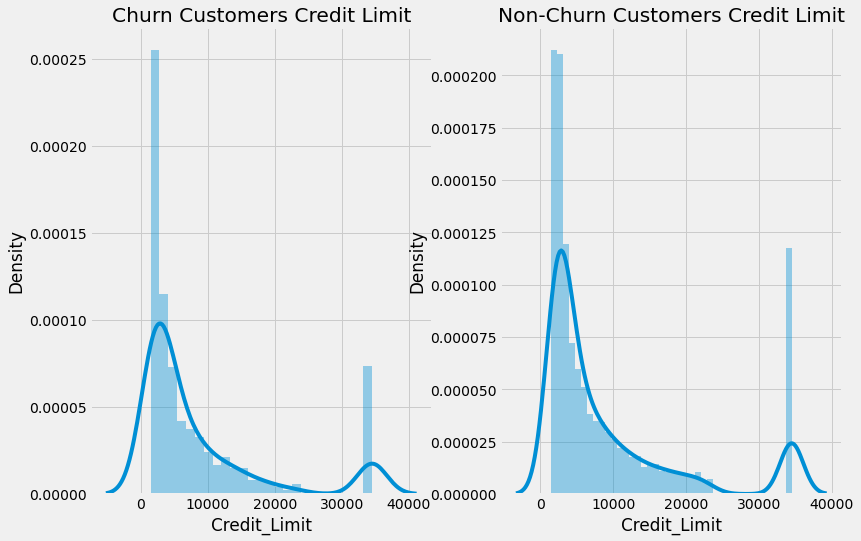

In [ ]:
#Distribution plot for Churn/Non Churn Customers

plt.figure(figsize = (12,8))

plt.subplot(1,2,1)
plt.title("Churn Customers Credit Limit")
sns.distplot(Churn.Credit_Limit)

plt.subplot(1,2,2)
plt.title("Non-Churn Customers Credit Limit")
sns.distplot(NonChurn.Credit_Limit)
plt.show()

Based on above Boxplo below are the observations:

1. Customers who has higher credit limit churn less than Churn Customers

In [ ]:
Churn['Total_Revolving_Bal'].describe()

count    1627.000000
mean      672.822987
std       921.385582
min         0.000000
25%         0.000000
50%         0.000000
75%      1303.500000
max      2517.000000
Name: Total_Revolving_Bal, dtype: float64

In [ ]:
NonChurn['Total_Revolving_Bal'].describe()

count    8500.000000
mean     1256.604118
std       757.745354
min         0.000000
25%       800.000000
50%      1364.000000
75%      1807.000000
max      2517.000000
Name: Total_Revolving_Bal, dtype: float64

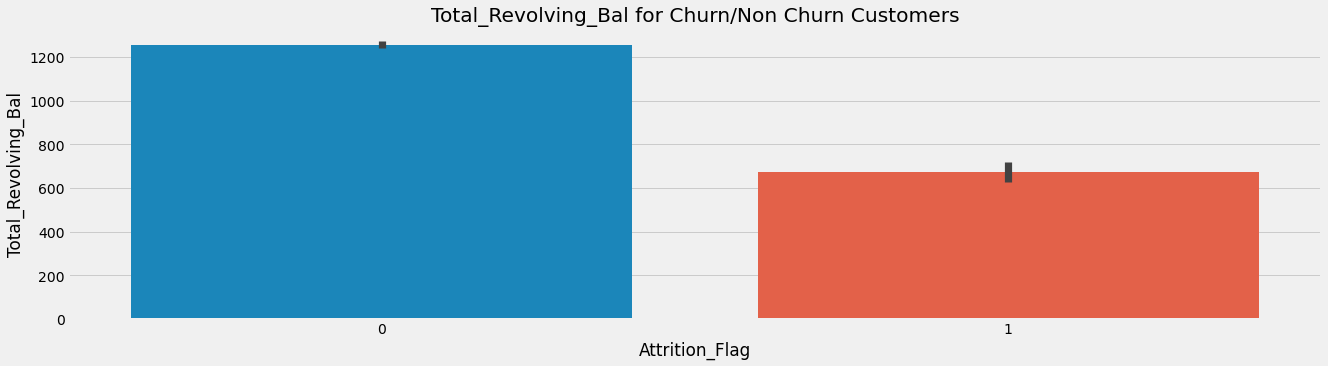

In [ ]:
#Total_Revolving_Bal for Churn/NonChurn Customers

plt.figure(figsize = (20,5))
sns.barplot(y='Total_Revolving_Bal',x='Attrition_Flag',data=credit_dataset)
plt.title('Total_Revolving_Bal for Churn/Non Churn Customers')
plt.show()

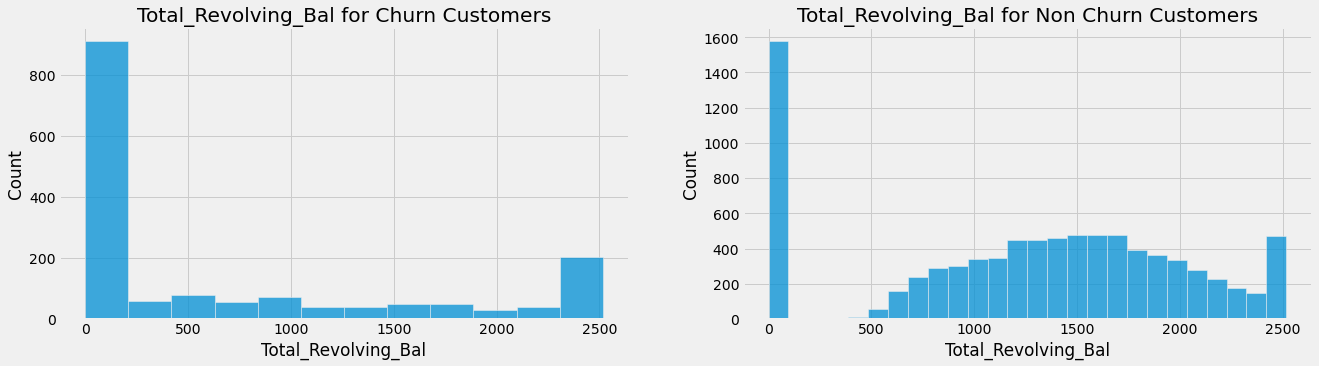

In [ ]:
#Plotting Histogram for Churn/Non Churn Customers

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Total_Revolving_Bal for Churn Customers')
sns.histplot(Churn.Total_Revolving_Bal)

plt.subplot(1,2,2)
plt.title('Total_Revolving_Bal for Non Churn Customers')
sns.histplot(NonChurn.Total_Revolving_Bal)
plt.show()

In [ ]:
best_score=Churn[Churn.Total_Revolving_Bal<0.3*Churn.Credit_Limit]
best_score['Total_Revolving_Bal'].shape

(1278,)

Based on above observations:

1. Revolving balance is less for Churn Customers and is maintained well,there does not seems to be rise and its seems that Churn Customers has constant revolving balance which will reduce the interest incurred as well as the obtain good credit score as compared to Non Churn which has a low -high peak.

2. On a avg,revolving balance for Churn is 672 which is half of Non Churn Customers

In [ ]:
credit_dataset['Avg_Open_To_Buy'].value_counts()

32183.4    963
1438.3     324
787.0        8
953.0        7
701.0        7
          ... 
290.0        1
13713.0      1
4174.0       1
5919.0       1
8427.0       1
Name: Avg_Open_To_Buy, Length: 6033, dtype: int64

In [ ]:
credit_dataset['Avg_Open_To_Buy'].describe()

count    10127.000000
mean      7626.207199
std       9426.277720
min          3.000000
25%       1324.500000
50%       3474.000000
75%       9859.000000
max      32183.400000
Name: Avg_Open_To_Buy, dtype: float64

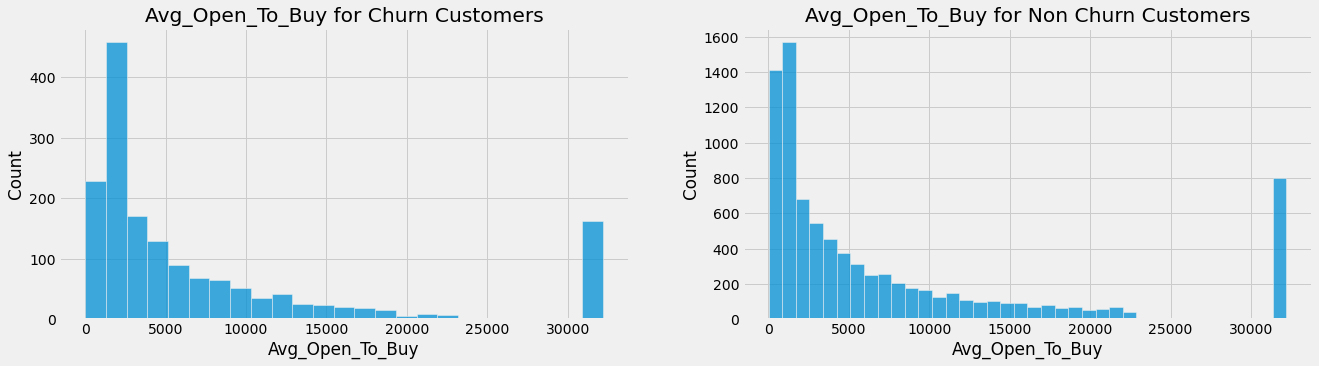

In [ ]:
#Plotting Histogram for Churn/Non Churn Customers for Avg_Open_To_Buy

plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.title('Avg_Open_To_Buy for Churn Customers')
sns.histplot(Churn.Avg_Open_To_Buy)

plt.subplot(1,2,2)
plt.title('Avg_Open_To_Buy for Non Churn Customers')
sns.histplot(NonChurn.Avg_Open_To_Buy)
plt.show()